# Togetherflow
**Emergent agent motion dynamics in immersive rooms**

In this notebook, we implement Togetherflow, a computational cognitive model that characterizes the motion pattern of human agents in immersive rooms.

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
%matplotlib inline

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numba import njit
from functools import partial

np.set_printoptions(suppress=True)

In [33]:
import tensorflow as tf
import bayesflow as bf
from bayesflow.simulation import Prior, Simulator, GenerativeModel

In [75]:
from initializations import initialize_agents, initialize_beacons
from influences import external_influence, internal_influence
from simulations import (
    look_at_beacon,
    walk_to_beacon,
    move_to_beacon
)
from priors import complete_pooling_prior_fun
from diagnostics import plot_external_influence, animate_reorientation

## Initializations

In [76]:
agent_positions, agent_rotations = initialize_agents()
beacon_positions = initialize_beacons()

In [77]:
type(agent_positions[0, 0])

numpy.float32

In [78]:
beacon_positions

array([[ 23.72925  ,  17.259583 ],
       [ 14.786099 ,   0.9122409],
       [  6.019285 ,  21.77993  ],
       [ 13.281269 ,   8.789626 ],
       [  7.047047 ,  -3.0697086],
       [ 22.212793 ,  22.75809  ],
       [ -8.647315 , -11.415907 ],
       [ 13.204426 ,   6.333242 ],
       [-15.87592  ,  14.450345 ],
       [-15.049339 ,  23.805882 ]], dtype=float32)

In [79]:
type(agent_rotations[0, 0])

numpy.float32

In [80]:
agent_rotations

array([[-1.4262123 ],
       [-2.919632  ],
       [ 2.0623221 ],
       [-0.66086984],
       [-0.5845162 ],
       [-2.517452  ],
       [-1.2661011 ],
       [-0.5441331 ],
       [ 0.00222812],
       [ 0.92974144],
       [ 1.7171785 ],
       [-0.80920875]], dtype=float32)

## Influences

In [83]:
num_agents = len(agent_positions)
e = np.empty((num_agents, 2))
for i in range(num_agents):
    influence = external_influence(agent_positions[i], beacon_positions[0])
    e[i, 0] = np.cos(influence)
    e[i, 1] = np.sin(influence)

e

array([[0.80741588, 0.58998271],
       [0.75010525, 0.66131847],
       [0.71352   , 0.70063486],
       [0.82245006, 0.56883732],
       [0.84980584, 0.52709586],
       [0.79029338, 0.61272864],
       [0.73190475, 0.68140695],
       [0.70653103, 0.70768207],
       [0.8348762 , 0.55043776],
       [0.81169334, 0.58408384],
       [0.78364265, 0.62121188],
       [0.89528109, 0.4455017 ]])

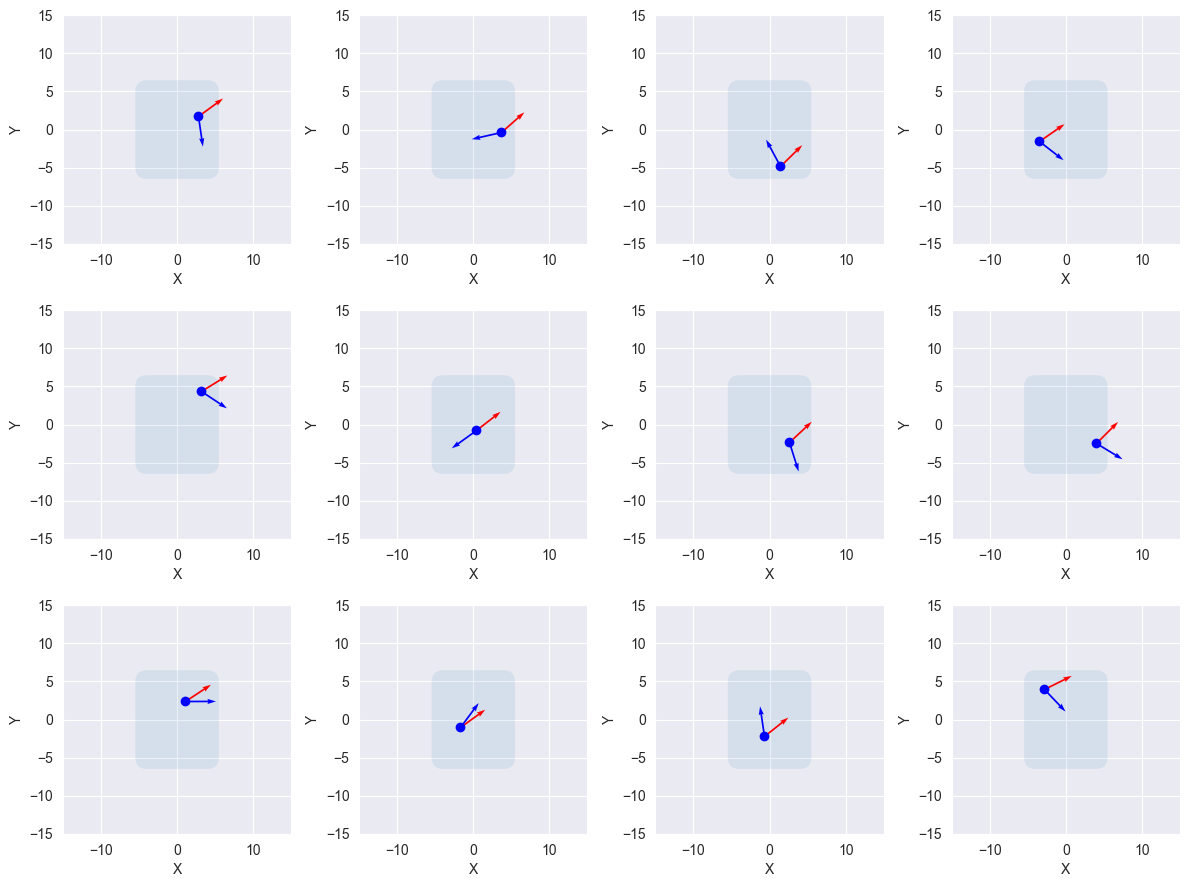

In [84]:
f = plot_external_influence(
    num_agents, agent_positions, agent_rotations, beacon_positions, e
)

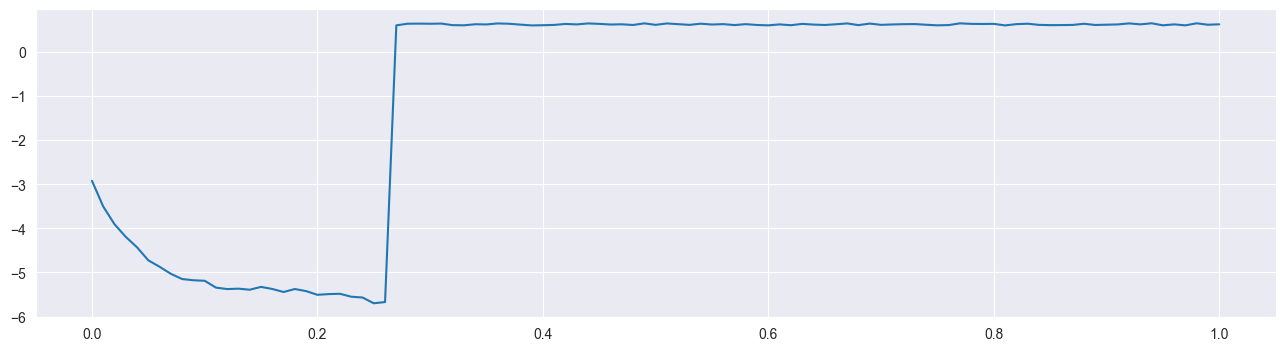

In [86]:
rotations = look_at_beacon(
    agent_rotation=agent_rotations[1],
    beacon_influence=beacon_positions[0],
    drift_rate=0.5 * np.pi,
    noise_amplitude=0.05,
    timesteps=101
)

f, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = plt.plot(np.linspace(0, 1, 101), rotations)

In [55]:
type(agent_positions[0, 0])
type(beacon_positions[0, 0])

numpy.float32

In [65]:
positions = move_to_beacon(
    agent_position=agent_positions[0],
    beacon_position=beacon_positions[0]
)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mCannot unify array(float32, 2d, C) and array(float64, 1d, C) for 'positions.2', defined at C:\Users\Gerald Wong\Documents\Native\Permanent\TogetherFlow\notebooks\togetherflow\simulations.py (173)
[1m
File "simulations.py", line 173:[0m
[1mdef move_to_beacon(
    <source elided>

[1m        noise = noise_amplitude * (np.random.random(size=2) - 0.5)
[0m        [1m^[0m[0m
[0m
[0m[1mDuring: typing of assignment at C:\Users\Gerald Wong\Documents\Native\Permanent\TogetherFlow\notebooks\togetherflow\simulations.py (173)[0m
[1m
File "simulations.py", line 173:[0m
[1mdef move_to_beacon(
    <source elided>

[1m        noise = noise_amplitude * (np.random.random(size=2) - 0.5)
[0m        [1m^[0m[0m
